### Рубежный контроль №1

### Гришин Илья Алексеевич, ИУ5-62Б, Вариант 6. Задание 1.

#### Задача №1.
Для заданного набора данных проведите корреляционный анализ. В случае наличия пропусков в данных удалите строки или колонки, содержащие пропуски. Сделайте выводы о возможности построения моделей машинного обучения и о возможном вкладе признаков в модель. Для произвольной колонки данных построить гистограмму.

# Технологии разведочного анализа и обработки данных.

Этот набор данных создан для прогнозирования поступления в аспирантуру с точки зрения Индии.

Набор данных содержит несколько параметров, которые считаются важными при подаче заявки на программу магистратуры.
Включены следующие параметры:

- Результаты GRE (из 340)                             
- Результаты TOEFL (из 120)                                
- Рейтинг вуза (из 5)                                 
- Заявление о целях и рекомендательное письмо (из 5 возможных) 
- Средний балл бакалавриата (из 10)                     
- Опыт исследования (0 или 1)                          
- Шанс допуска (от 0 до 1) 


В dataset обозначены как:

- (GRE Scores)
- (TOEFL Scores )
- (University Rating)
- (Statement of Purpose and Letter of Recommendation Strength)
- (Undergraduate GPA)
- (Research Experience)
- (Chance of Admit)

Шанс допуска (Chance of Admit) является целевым признаком


In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [4]:
data = pd.read_csv('Admission_Predict.csv', sep=",")

In [5]:
# размер набора данных
data.shape

(400, 9)

In [6]:
# типы колонок
data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [9]:
# проверим есть ли пропущенные значения
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [8]:
# Первые 5 строк датасета
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [11]:
# Основные статистические характеристки набора данных
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


## Гистограмма

Построим гистрограмму, которая позволит оценить плотность вероятности распределения данных.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CGPA', ylabel='Density'>

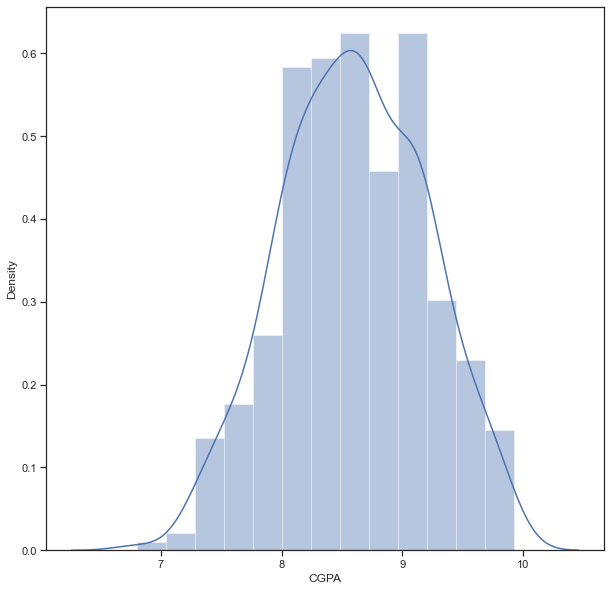

In [27]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['CGPA'])

## Информация о корреляции признаков

In [12]:
data.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


<AxesSubplot:>

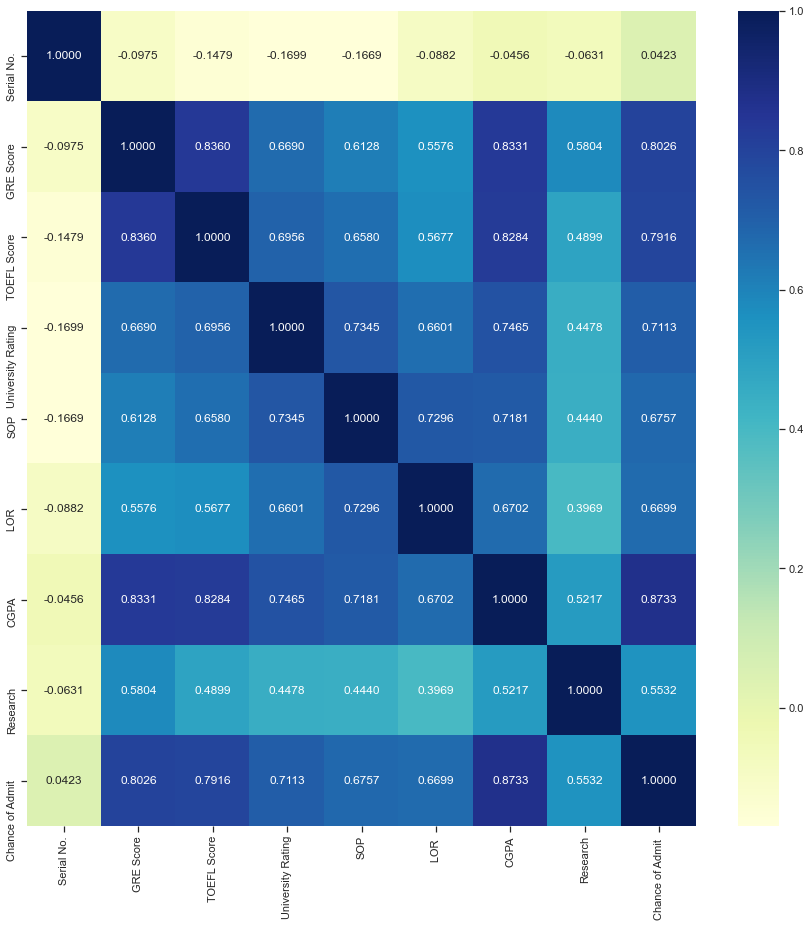

In [22]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(data.corr(), annot=True, fmt='.4f', cmap="YlGnBu")

<AxesSubplot:>

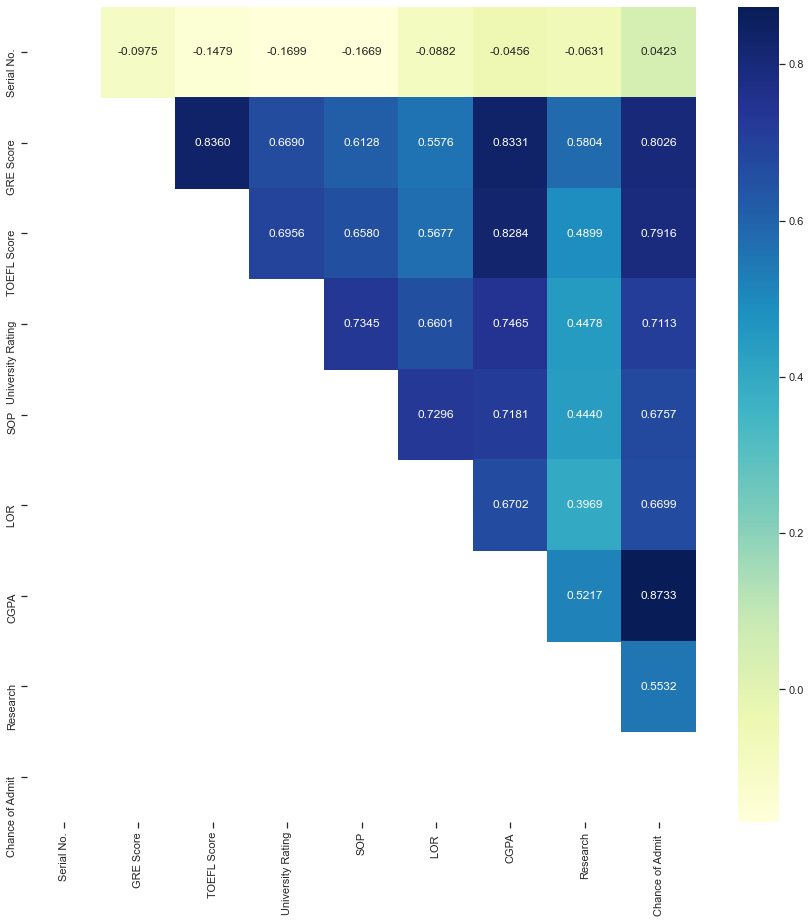

In [23]:
# Вывод значений в ячейках
fig, ax = plt.subplots(figsize=(15,15))
mask = np.zeros_like(data.corr(), dtype=bool)
mask[np.tril_indices_from(mask)] = True
sns.heatmap(data.corr(), mask=mask, annot=True, fmt='.4f', cmap="YlGnBu")

## Выводы о коррелирующих признаках

На основе нашей корреляционной матрице, визуализированной с помощью тепловой карты, определим признаки которые коррелируют с нашим целевым признаком.

Отрицательный коэффициент корреляции показывает, что две переменные могут быть связаны таким образом, что при возрастании значений одной из них значения другой убывают.

- Serial No. является числовым идентификатором записей от 1 до 400, который никаким образом не влияет на построение модели, однако в целях удаления лишних признаков его можно удалить


- Наиболее коррелируемым признаком является Undergraduate GPA (СGPA) (Средний балл бакалавриата) (0,8733), поэтому оставляем его в модели


- Вторым по коэффициенту корреляции является GRE Scores (GRE) (Результаты GRE) (0,8026), поэтому оставляем его в модели


- Целевой признак хорошо коррелирует со следующими признаками: TOEFL Scores (0,7916), University Rating (0,7113), Statement of Purpose (SOP) (0,6757), Letter of Recommendation (LOR) (0,6699), Research Experience (0,5532) 


- Признак TOEFL Scores сильно коррелирует с признаком GRE Scores (0,8360), поэтому в модели можно оставить лишь один из них


- Признак GRE Scores сильно коррелирует с признаком Undergraduate GPA (СGPA) (0,8331), поэтому в модели можно оставить лишь один из них


- Также, признак TOEFL Scores сильно коррелирует с признаком Undergraduate GPA (СGPA) (0,8284), поэтому в модели можно оставить лишь один из них


- Таким образом, из-за сильных корреляций признака Undergraduate GPA (СGPA) с признаками GRE Scores и TOEFL Scores, а также значительными корреляциями с другими признаками, этот признак можно удалить, однако именно он дает самую большую корреляцию с целевым признаком, поэтому наиболее подходящий признак к удалению: GRE Scores